In this jupyter notebook, I'll analyze weightlifting data from the summer olympics from 2000 to 2020 and see what interesting items I can come up with.
Specifically, I'll take a look at the ratios of weights lifted to bodyweight for different weightclasses. It generally holds that heavier competitors can lift heavier weights, so investigating the ratios of weights lifted to bodyweight may be more interesting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\jflieder'

In [3]:
os.chdir(r"C:\Users\jflieder\Desktop\Code\Data Science Portfolio\Data Science projects") #make sure I'm working in the same directory as the target dataset
os.getcwd()

'C:\\Users\\jflieder\\Desktop\\Code\\Data Science Portfolio\\Data Science projects'

In [4]:
data = pd.read_csv("weight.csv")
data.head()

,Unnamed: 0,Athlete,Bodyweight (kg),Snatch (kg),Clean & Jerk (kg),Total (kg),Ranking,Url,Title,Year,Gender
0,0,Halil Mutlu (TUR),55.62,137.5,167.5,305.0,1,https://en.wikipedia.org//wiki/Weightlifting_a...,Weightlifting at the 2000 Summer Olympics – Me...,2000,Men
1,1,Wu Wenxiong (CHN),55.48,125.0,162.5,287.5,2,https://en.wikipedia.org//wiki/Weightlifting_a...,Weightlifting at the 2000 Summer Olympics – Me...,2000,Men
2,2,Zhang Xiangxiang (CHN),55.94,125.0,162.5,287.5,3,https://en.wikipedia.org//wiki/Weightlifting_a...,Weightlifting at the 2000 Summer Olympics – Me...,2000,Men
3,3,Wang Shin-yuan (TPE),55.38,125.0,160.0,285.0,4,https://en.wikipedia.org//wiki/Weightlifting_a...,Weightlifting at the 2000 Summer Olympics – Me...,2000,Men
4,4,Sergio Álvarez (CUB),55.66,120.0,155.0,275.0,5,https://en.wikipedia.org//wiki/Weightlifting_a...,Weightlifting at the 2000 Summer Olympics – Me...,2000,Men


In [5]:
data.isnull().sum() #check for bad data entries

Unnamed: 0           0
Athlete              0
Bodyweight (kg)      0
Snatch (kg)          0
Clean & Jerk (kg)    0
Total (kg)           0
Ranking              0
Url                  0
Title                0
Year                 0
Gender               0
dtype: int64

In [6]:
data = data[['Athlete', 'Bodyweight (kg)', 'Snatch (kg)', 'Clean & Jerk (kg)', 'Total (kg)', 'Ranking', 'Year', 'Gender']]
data.rename(columns = {'Bodyweight (kg)':'BW', 'Snatch (kg)': 'SN', 'Clean & Jerk (kg)': 'CJ', 'Total (kg)': 'Total'}, inplace = True)
data.head()

,Athlete,BW,SN,CJ,Total,Ranking,Year,Gender
0,Halil Mutlu (TUR),55.62,137.5,167.5,305.0,1,2000,Men
1,Wu Wenxiong (CHN),55.48,125.0,162.5,287.5,2,2000,Men
2,Zhang Xiangxiang (CHN),55.94,125.0,162.5,287.5,3,2000,Men
3,Wang Shin-yuan (TPE),55.38,125.0,160.0,285.0,4,2000,Men
4,Sergio Álvarez (CUB),55.66,120.0,155.0,275.0,5,2000,Men


In [7]:
data.dtypes

Athlete     object
BW         float64
SN         float64
CJ         float64
Total      float64
Ranking      int64
Year         int64
Gender      object
dtype: object

I would like to investigate proportions of bodyweight to the weights lifted, so I'll add some columns.

In [8]:
data['SN_to_BW'] = data.apply(lambda row: row.SN / row.BW, axis = 1)
data['CJ_to_BW'] = data.apply(lambda row: row.CJ / row.BW, axis = 1)
data['Total_to_BW'] = data.apply(lambda row: row.Total / row.BW, axis = 1)
data.head()

,Athlete,BW,SN,CJ,Total,Ranking,Year,Gender,SN_to_BW,CJ_to_BW,Total_to_BW
0,Halil Mutlu (TUR),55.62,137.5,167.5,305.0,1,2000,Men,2.472132,3.011507,5.483639
1,Wu Wenxiong (CHN),55.48,125.0,162.5,287.5,2,2000,Men,2.253064,2.928983,5.182048
2,Zhang Xiangxiang (CHN),55.94,125.0,162.5,287.5,3,2000,Men,2.234537,2.904898,5.139435
3,Wang Shin-yuan (TPE),55.38,125.0,160.0,285.0,4,2000,Men,2.257133,2.889130,5.146262
4,Sergio Álvarez (CUB),55.66,120.0,155.0,275.0,5,2000,Men,2.155947,2.784765,4.940711


In [9]:
data['SN'].value_counts()

-1.0      88
 175.0    36
 155.0    34
 105.0    33
 140.0    32
          ..
 203.0     1
 169.0     1
 63.0      1
 89.0      1
 5.0       1
Name: SN, Length: 181, dtype: int64

It appears that an entry of -1 signifies a lack of a good lift for that event. Let's get a gender breakdown for that.

In [10]:
data_men = data[data['Gender'] == 'Men']
data_women = data[data['Gender'] == 'Women']
men_SN_fail_count = data_men['SN'].value_counts()[-1]
men_CJ_fail_count = data_men['CJ'].value_counts()[-1]
women_SN_fail_count = data_women['SN'].value_counts()[-1]
women_CJ_fail_count = data_women['CJ'].value_counts()[-1]

In [11]:
print('Of the male competitors,', men_SN_fail_count, 'failed to record a good snatch lift and', men_CJ_fail_count, 'failed to record a good clean and jerk lift.')
print('Of the female competitors,', women_SN_fail_count, 'failed to record a good snatch lift and', women_CJ_fail_count, 'failed to record a good clean and jerk lift.')

Of the male competitors, 64 failed to record a good snatch lift and 145 failed to record a good clean and jerk lift.
Of the female competitors, 24 failed to record a good snatch lift and 52 failed to record a good clean and jerk lift.


In [12]:
men_any_fail_count = len(data_men[(data_men['SN'] == -1) | (data_men['CJ'] == -1)])
women_any_fail_count = len(data_women[(data_women['SN'] == -1) | (data_women['CJ'] == -1)])
print('Of all male competitors,', men_any_fail_count, 'competitors failed to record a good lift for either snatch or clean and jerk. This is', round( ((men_any_fail_count / len(data_men)) * 100), 2), 'percent of all male competitors.')
print()
print('Of all female competitors,', women_any_fail_count, 'competitors failed to record a good lift for either snatch or clean and jerk. This is', round( ((women_any_fail_count / len(data_women)) * 100), 2), 'percent of all female competitors.')

Of all male competitors, 145 competitors failed to record a good lift for either snatch or clean and jerk. This is 16.51 percent of all male competitors.

Of all female competitors, 52 competitors failed to record a good lift for either snatch or clean and jerk. This is 9.29 percent of all female competitors.


I'm inferring from these numbers that if no snatch is completed, a competitor may not bother or be allowed to attempt a clean and jerk.

I'll now remove the rows with entries of -1 in the weight lifted columns. I could choose to leave them in, but I believe I'll get a better comparison of the weightclasses without those rows.

In [13]:
print(len(data_men))
print(len(data_women))

878
560


In [14]:
data_men = data_men[(data_men['SN'] != -1) & (data_men['CJ'] != -1)]
data_women = data_women[(data_women['SN'] != -1) & (data_women['CJ'] != -1)]

In [15]:
data_men.head()

,Athlete,BW,SN,CJ,Total,Ranking,Year,Gender,SN_to_BW,CJ_to_BW,Total_to_BW
0,Halil Mutlu (TUR),55.62,137.5,167.5,305.0,1,2000,Men,2.472132,3.011507,5.483639
1,Wu Wenxiong (CHN),55.48,125.0,162.5,287.5,2,2000,Men,2.253064,2.928983,5.182048
2,Zhang Xiangxiang (CHN),55.94,125.0,162.5,287.5,3,2000,Men,2.234537,2.904898,5.139435
3,Wang Shin-yuan (TPE),55.38,125.0,160.0,285.0,4,2000,Men,2.257133,2.889130,5.146262
4,Sergio Álvarez (CUB),55.66,120.0,155.0,275.0,5,2000,Men,2.155947,2.784765,4.940711


In [16]:
data_women.head()

,Athlete,BW,SN,CJ,Total,Ranking,Year,Gender,SN_to_BW,CJ_to_BW,Total_to_BW
22,Tara Nott (USA),47.48,82.5,102.5,185.0,1,2000,Women,1.737574,2.158804,3.896377
23,Raema Lisa Rumbewas (INA),47.98,80.0,105.0,185.0,2,2000,Women,1.667361,2.188412,3.855773
24,Sri Indriyani (INA),47.28,82.5,100.0,182.5,3,2000,Women,1.744924,2.115059,3.859983
25,Kay Thi Win (MYA),47.48,80.0,100.0,180.0,4,2000,Women,1.684920,2.106150,3.791070
26,Robin Goad (USA),47.66,77.5,100.0,177.5,5,2000,Women,1.626102,2.098196,3.724297


In [17]:
print(len(data_men))
print(len(data_women))

733
508


I also need to remove rows where the bodyweight is entered at -1 for some reason. Otherwise, ratios of weights to bodyweight will throw off the data.

In [18]:
data_men = data_men[(data_men['BW'] != -1)]
data_women = data_women[(data_women['BW'] != -1)]

In [19]:
print(len(data_men))
print(len(data_women))

729
505


Now I'll make a boxplot of the ratio of average total weight lifted to bodyweight for each weightclass for both men and women. To do this, I'll just add in a column each to the data_men and data_women dataframes establishing the weightclass of the lifter of each row. This will be imperfect because the weightclass limits are not held consistent from 2000 through 2020.

In [20]:
data_men['Class'] = '' #create empty column for now
data_women['Class'] = ''
data_men.loc[data_men["BW"] < 56, "Class"] = 'Men 55kg'
data_men.loc[(data_men["BW"] >= 56) & (data_men["BW"] < 63), "Class"] = 'Men 62kg'
data_men.loc[(data_men["BW"] >= 63) & (data_men["BW"] < 70), "Class"] = 'Men 69kg'
data_men.loc[(data_men["BW"] >= 70) & (data_men["BW"] < 78), "Class"] = 'Men 77kg'
data_men.loc[(data_men["BW"] >= 78) & (data_men["BW"] < 86), "Class"] = 'Men 85kg'
data_men.loc[(data_men["BW"] >= 86) & (data_men["BW"] < 95), "Class"] = 'Men 94kg'
data_men.loc[(data_men["BW"] >= 95) & (data_men["BW"] < 106), "Class"] = 'Men 105kg'
data_men.loc[(data_men["BW"] >= 106), "Class"] = 'Men 105+kg'
print(data_men['Class'].value_counts())

data_women.loc[data_women["BW"] < 50, "Class"] = 'Women 49kg'
data_women.loc[(data_women["BW"] >= 50) & (data_women["BW"] < 56), "Class"] = 'Women 55kg'
data_women.loc[(data_women["BW"] >= 56) & (data_women["BW"] < 60), "Class"] = 'Women 59kg'
data_women.loc[(data_women["BW"] >= 60) & (data_women["BW"] < 65), "Class"] = 'Women 64kg'
data_women.loc[(data_women["BW"] >= 65) & (data_women["BW"] < 77), "Class"] = 'Women 76kg'
data_women.loc[(data_women["BW"] >= 77) & (data_women["BW"] < 88), "Class"] = 'Women 87kg'
data_women.loc[(data_women["BW"] >= 88), "Class"] = 'Women 87+kg'
print(data_women['Class'].value_counts())


Men 105+kg    110
Men 69kg      101
Men 77kg       97
Men 85kg       95
Men 94kg       91
Men 62kg       84
Men 55kg       76
Men 105kg      75
Name: Class, dtype: int64
Women 76kg     131
Women 59kg      88
Women 49kg      71
Women 55kg      67
Women 64kg      66
Women 87+kg     66
Women 87kg      16
Name: Class, dtype: int64


[Text(0.5, 0, 'Weightclass'),
 Text(0, 0.5, 'Ratio of Total Weight Lifted to Bodyweight'),
 Text(0.5, 1.0, 'Women Weight Ratio by Weightclass')]

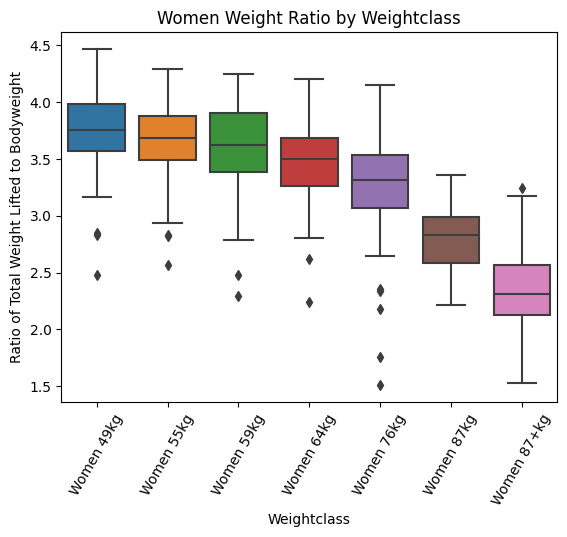

In [21]:
ax = sns.boxplot(data = data_women, x = 'Class', y = 'Total_to_BW', order = ['Women 49kg', 'Women 55kg', 'Women 59kg', 'Women 64kg', 'Women 76kg', 'Women 87kg', 'Women 87+kg'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
ax.set(xlabel ="Weightclass", ylabel = "Ratio of Total Weight Lifted to Bodyweight", title ='Women Weight Ratio by Weightclass')

[Text(0.5, 0, 'Weightclass'),
 Text(0, 0.5, 'Ratio of Total Weight Lifted to Bodyweight'),
 Text(0.5, 1.0, 'Men Weight Ratio by Weightclass')]

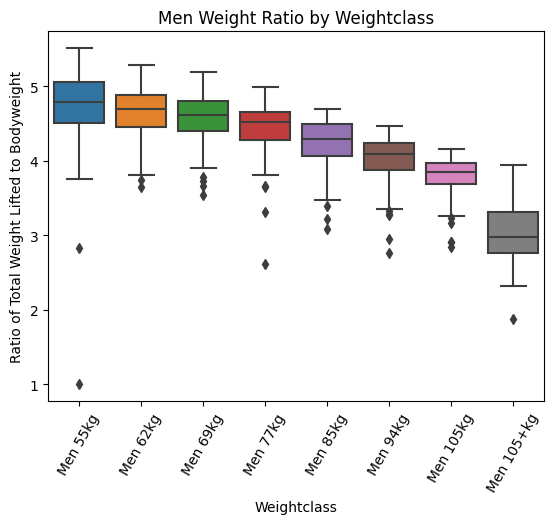

In [22]:
ax1 = sns.boxplot(data = data_men, x = 'Class', y = 'Total_to_BW', order = ['Men 55kg', 'Men 62kg', 'Men 69kg', 'Men 77kg', 'Men 85kg', 'Men 94kg', 'Men 105kg', 'Men 105+kg'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=60)
ax1.set(xlabel ="Weightclass", ylabel = "Ratio of Total Weight Lifted to Bodyweight", title ='Men Weight Ratio by Weightclass')

For both men and women, there is a general decrease in the ratio of the total weight lifted to bodyweight as the weightclass gets heavier.

Now I'll break the data apart in order to put back together aggregates of each weightclass into a new dataframe.

In [23]:
data_men_55 = data_men[(data_men['BW'] < 56)]
data_men_62 = data_men[(data_men['BW'] < 63) & (data_men['BW'] >= 56)]
data_men_69 = data_men[(data_men['BW'] < 70) & (data_men['BW'] >= 63)]
data_men_77 = data_men[(data_men['BW'] < 78) & (data_men['BW'] >= 70)]
data_men_85 = data_men[(data_men['BW'] < 86) & (data_men['BW'] >= 78)]
data_men_94 = data_men[(data_men['BW'] < 95) & (data_men['BW'] >= 86)]
data_men_105 = data_men[(data_men['BW'] < 106) & (data_men['BW'] >= 94)]
data_men_heavy = data_men[(data_men['BW'] >= 106)]
data_women_49 = data_women[(data_women['BW'] < 50)]
data_women_55 = data_women[(data_women['BW'] < 56) & (data_women['BW'] >= 50)]
data_women_59 = data_women[(data_women['BW'] < 60) & (data_women['BW'] >= 56)]
data_women_64 = data_women[(data_women['BW'] < 65) & (data_women['BW'] >= 60)]
data_women_76 = data_women[(data_women['BW'] < 77) & (data_women['BW'] >= 65)]
data_women_87 = data_women[(data_women['BW'] < 88) & (data_women['BW'] >= 77)]
data_women_heavy = data_women[(data_women['BW'] >= 88)]

In [24]:
categories = [[data_men_55], [data_men_62], [data_men_69], [data_men_77], [data_men_85], [data_men_94], [data_men_105], \
[data_men_heavy], [data_women_49], [data_women_55], [data_women_59], [data_women_64], [data_women_76], [data_women_87], \
[data_women_heavy]]

weightclasses = [['Men 55kg'], ['Men 62kg'], ['Men 69kg'], ['Men 77kg'], ['Men 85kg'], ['Men 94kg'], \
['Men 105kg'], ['Men 105kg+'], ['Women 49kg'], ['Women 55kg'], ['Women 59kg'], ['Women 64kg'], \
['Women 76kg'], ['Women 87kg'], ['Women 87kg+']]

columns_lst = ['Class', 'SN_to_BW_avg %', 'SN_to_BW_med %', 'SN_to_BW_max %', 'CJ_to_BW_avg %', 'CJ_to_BW_med %', 'CJ_to_BW_max %', 'Total_to_BW_avg %', 'Total_to_BW_med %', 'Total_to_BW_max %']

count = 0
for division in categories:
    weightclasses[count].append(categories[count][0]['SN_to_BW'].mean() * 100)
    weightclasses[count].append(categories[count][0]['SN_to_BW'].median() * 100)
    weightclasses[count].append(categories[count][0]['SN_to_BW'].max() * 100)
    weightclasses[count].append(categories[count][0]['CJ_to_BW'].mean() * 100)
    weightclasses[count].append(categories[count][0]['CJ_to_BW'].median() * 100)
    weightclasses[count].append(categories[count][0]['CJ_to_BW'].max() * 100)
    weightclasses[count].append(categories[count][0]['Total_to_BW'].mean() * 100)
    weightclasses[count].append(categories[count][0]['Total_to_BW'].median() * 100)
    weightclasses[count].append(categories[count][0]['Total_to_BW'].max() * 100)
    count += 1


This dataframe with show the ratio of competition weight lifted to body weight by percentage. It is usually the case that heavier competitors will be able to lift higher weights, so normalizing by bodyweight makes for a more interesting analysis. 

In [25]:
data_ratios = pd.DataFrame(data = weightclasses, columns= columns_lst)
data_ratios

,Class,SN_to_BW_avg %,SN_to_BW_med %,SN_to_BW_max %,CJ_to_BW_avg %,CJ_to_BW_med %,CJ_to_BW_max %,Total_to_BW_avg %,Total_to_BW_med %,Total_to_BW_max %
0,Men 55kg,209.982380,212.765062,247.213233,261.797018,268.632547,305.316092,470.345833,478.809234,551.364943
1,Men 62kg,208.567223,210.543597,247.693055,257.925291,260.590337,288.336582,466.492514,469.667013,529.383196
2,Men 69kg,206.387522,207.462687,239.408009,252.502294,255.102041,283.512649,458.889816,461.560862,519.773190
3,Men 77kg,200.027236,202.086050,230.378758,243.018676,248.106555,280.876755,443.032316,451.881755,499.656829
4,Men 85kg,190.185981,194.437898,218.443736,232.469516,236.714404,257.536197,422.655497,429.987608,469.973890
5,Men 94kg,180.572967,185.821697,202.527544,219.698051,224.167378,249.144568,400.265117,409.643695,446.963216
6,Men 105kg,171.788052,176.308015,194.680851,206.583373,210.330659,232.978723,378.371425,386.208225,427.659574
7,Men 105kg+,136.370646,134.547340,179.063361,166.150673,163.035189,217.431193,302.521319,297.545840,394.495413
8,Women 49kg,165.887892,167.469123,206.524042,208.887793,209.248797,246.523388,374.775685,374.947633,446.691951
9,Women 55kg,162.389223,163.210445,190.621426,204.146263,207.263738,248.576850,366.535487,368.271955,428.898208


From this dataframe data_ratios, the maximums, averages, and medians of bodyweight-to-weight-lifted ratios for each weightclass can be seen. I'll next quantify the marginal changes from each weightclass relative to the next lowest weightclass.

In [26]:
data_ratios_men = data_ratios.iloc[0:8]
data_ratios_women = data_ratios.iloc[8:]

In [27]:
columns_lst_marginal = ['SN_to_BW_avg % marginal change', 'SN_to_BW_med % marginal change', 'SN_to_BW_max % marginal change', 'CJ_to_BW_avg % marginal change', 'CJ_to_BW_med % marginal change', 'CJ_to_BW_max % marginal change', 'Total_to_BW_avg % marginal change', 'Total_to_BW_med % marginal change', 'Total_to_BW_max % marginal change']

weightclasses_men = ['Men 55kg', 'Men 62kg', 'Men 69kg', 'Men 77kg', 'Men 85kg', 'Men 94kg', \
'Men 105kg', 'Men 105kg+']

weightclasses_women = ['Women 49kg', 'Women 55kg', 'Women 59kg', 'Women 64kg', \
'Women 76kg', 'Women 87kg', 'Women 87kg+']

first_row_marginal = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
data_marginal_men = pd.DataFrame([first_row_marginal], columns = columns_lst_marginal, index = weightclasses_men)

for num in range(1, len(data_marginal_men)):
    new_row = data_ratios_men.iloc[num][1:] - data_ratios_men.iloc[num-1][1:]
    data_marginal_men.iloc[num] = new_row
data_marginal_men


,SN_to_BW_avg % marginal change,SN_to_BW_med % marginal change,SN_to_BW_max % marginal change,CJ_to_BW_avg % marginal change,CJ_to_BW_med % marginal change,CJ_to_BW_max % marginal change,Total_to_BW_avg % marginal change,Total_to_BW_med % marginal change,Total_to_BW_max % marginal change
Men 55kg,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Men 62kg,-1.415157,-2.221465,0.479822,-3.871728,-8.042209,-16.97951,-3.853319,-9.142221,-21.981747
Men 69kg,-2.179702,-3.080911,-8.285046,-5.422997,-5.488296,-4.823933,-7.602698,-8.106151,-9.610006
Men 77kg,-6.360286,-5.376637,-9.029251,-9.483618,-6.995486,-2.635894,-15.857499,-9.679107,-20.116361
Men 85kg,-9.841255,-7.648152,-11.935022,-10.54916,-11.392151,-23.340558,-20.37682,-21.894147,-29.682939
Men 94kg,-9.613014,-8.616201,-15.916192,-12.771465,-12.547026,-8.391629,-22.39038,-20.343913,-23.010674
Men 105kg,-8.784915,-9.513682,-7.846693,-13.114678,-13.836719,-16.165845,-21.893691,-23.43547,-19.303642
Men 105kg+,-35.417407,-41.760675,-15.61749,-40.4327,-47.29547,-15.547531,-75.850107,-88.662385,-33.164162


In [28]:
data_marginal_women = pd.DataFrame([first_row_marginal], columns = columns_lst_marginal, index = weightclasses_women)

for num in range(1, len(data_marginal_women)):
    new_row = data_ratios_women.iloc[num][1:] - data_ratios_women.iloc[num-1][1:]
    new_row.name = weightclasses_women[num]
    data_marginal_women.iloc[num] = new_row
data_marginal_women

,SN_to_BW_avg % marginal change,SN_to_BW_med % marginal change,SN_to_BW_max % marginal change,CJ_to_BW_avg % marginal change,CJ_to_BW_med % marginal change,CJ_to_BW_max % marginal change,Total_to_BW_avg % marginal change,Total_to_BW_med % marginal change,Total_to_BW_max % marginal change
Women 49kg,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
Women 55kg,-3.498669,-4.258677,-15.902616,-4.741529,-1.985058,2.053462,-8.240198,-6.675678,-17.793743
Women 59kg,-3.751782,-2.637516,2.734173,-4.211393,-7.296934,-9.242823,-7.963175,-6.06255,-4.613972
Women 64kg,-4.56257,-3.031121,-8.88335,-10.125116,-7.688379,-3.53037,-14.687686,-12.164089,-4.00833
Women 76kg,-7.689287,-9.273848,1.385164,-8.340695,-8.87943,-6.385914,-16.029982,-18.70799,-5.00075
Women 87kg,-22.357704,-20.124707,-39.705323,-25.969014,-28.029971,-39.876752,-48.326717,-48.648428,-79.582075
Women 87kg+,-20.88026,-24.911139,1.438566,-25.749535,-25.908747,-12.627688,-46.629794,-51.312797,-11.189122


These last two dataframes show for each weightclass and competition lift amount (snatch, clean & jerk, and total), what the percentage change of lift amount to bodyweight ratio is for that figure compared to that from the next lighter weightclass. 

Now I'll give a barplot for these differences for total weight lifted to bodyweight average for each men and women.

In [29]:
data_marginal_men_trimmed = data_marginal_men.iloc[1:] #to get rid of the blank row of the lightest weightclass
data_marginal_men_trimmed.set_index([pd.Index(['55kg to 62kg', '62kg to 69kg', '69kg to 77kg', '77kg to 85kg', '85kg to 94kg', '94kg to 105kg', '105kg to unlimited'])], inplace = True)
data_marginal_men_trimmed

,SN_to_BW_avg % marginal change,SN_to_BW_med % marginal change,SN_to_BW_max % marginal change,CJ_to_BW_avg % marginal change,CJ_to_BW_med % marginal change,CJ_to_BW_max % marginal change,Total_to_BW_avg % marginal change,Total_to_BW_med % marginal change,Total_to_BW_max % marginal change
55kg to 62kg,-1.415157,-2.221465,0.479822,-3.871728,-8.042209,-16.97951,-3.853319,-9.142221,-21.981747
62kg to 69kg,-2.179702,-3.080911,-8.285046,-5.422997,-5.488296,-4.823933,-7.602698,-8.106151,-9.610006
69kg to 77kg,-6.360286,-5.376637,-9.029251,-9.483618,-6.995486,-2.635894,-15.857499,-9.679107,-20.116361
77kg to 85kg,-9.841255,-7.648152,-11.935022,-10.54916,-11.392151,-23.340558,-20.37682,-21.894147,-29.682939
85kg to 94kg,-9.613014,-8.616201,-15.916192,-12.771465,-12.547026,-8.391629,-22.39038,-20.343913,-23.010674
94kg to 105kg,-8.784915,-9.513682,-7.846693,-13.114678,-13.836719,-16.165845,-21.893691,-23.43547,-19.303642
105kg to unlimited,-35.417407,-41.760675,-15.61749,-40.4327,-47.29547,-15.547531,-75.850107,-88.662385,-33.164162


In [30]:
data_marginal_women_trimmed = data_marginal_women.iloc[1:] #to get rid of the blank row of the lightest weightclass
data_marginal_women_trimmed.set_index([pd.Index(['49kg to 55kg', '55kg to 59kg', '59kg to 64kg', '64kg to 76kg', '76kg to 87kg', '87kg to unlimited'])], inplace = True)
data_marginal_women_trimmed

,SN_to_BW_avg % marginal change,SN_to_BW_med % marginal change,SN_to_BW_max % marginal change,CJ_to_BW_avg % marginal change,CJ_to_BW_med % marginal change,CJ_to_BW_max % marginal change,Total_to_BW_avg % marginal change,Total_to_BW_med % marginal change,Total_to_BW_max % marginal change
49kg to 55kg,-3.498669,-4.258677,-15.902616,-4.741529,-1.985058,2.053462,-8.240198,-6.675678,-17.793743
55kg to 59kg,-3.751782,-2.637516,2.734173,-4.211393,-7.296934,-9.242823,-7.963175,-6.06255,-4.613972
59kg to 64kg,-4.56257,-3.031121,-8.88335,-10.125116,-7.688379,-3.53037,-14.687686,-12.164089,-4.00833
64kg to 76kg,-7.689287,-9.273848,1.385164,-8.340695,-8.87943,-6.385914,-16.029982,-18.70799,-5.00075
76kg to 87kg,-22.357704,-20.124707,-39.705323,-25.969014,-28.029971,-39.876752,-48.326717,-48.648428,-79.582075
87kg to unlimited,-20.88026,-24.911139,1.438566,-25.749535,-25.908747,-12.627688,-46.629794,-51.312797,-11.189122


[Text(0, 0, '-3.85332'),
 Text(0, 0, '-7.6027'),
 Text(0, 0, '-15.8575'),
 Text(0, 0, '-20.3768'),
 Text(0, 0, '-22.3904'),
 Text(0, 0, '-21.8937'),
 Text(0, 0, '-75.8501')]

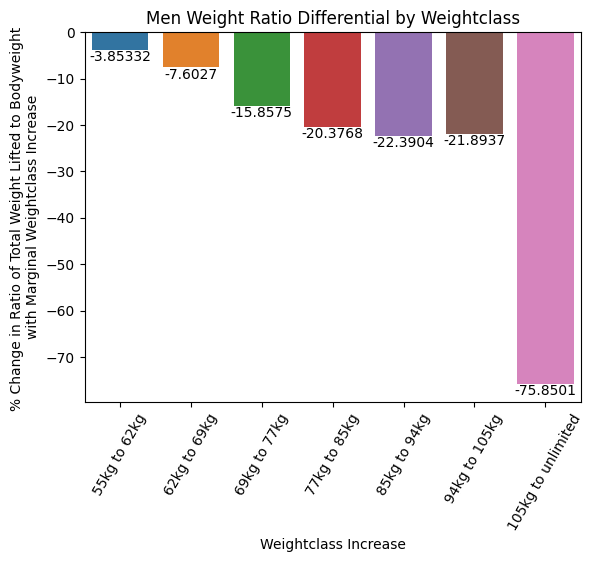

In [31]:
ax2 = sns.barplot(data = data_marginal_men_trimmed, x = data_marginal_men_trimmed.index, y = 'Total_to_BW_avg % marginal change')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60) #to have the xtick labels be more vertical
ax2.set(xlabel ="Weightclass Increase", ylabel = "% Change in Ratio of Total Weight Lifted to Bodyweight \nwith Marginal Weightclass Increase", title ='Men Weight Ratio Differential by Weightclass')
ax2.bar_label(ax2.containers[0]) #to display the values

[Text(0, 0, '-8.2402'),
 Text(0, 0, '-7.96317'),
 Text(0, 0, '-14.6877'),
 Text(0, 0, '-16.03'),
 Text(0, 0, '-48.3267'),
 Text(0, 0, '-46.6298')]

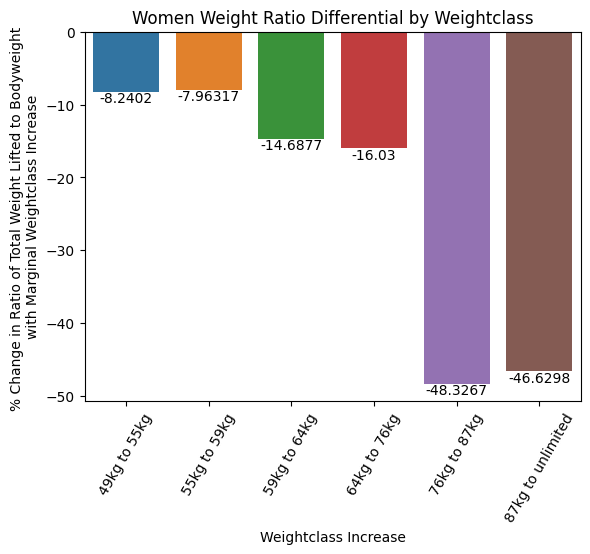

In [32]:
ax3 = sns.barplot(data = data_marginal_women_trimmed, x = data_marginal_women_trimmed.index, y = 'Total_to_BW_avg % marginal change')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=60) #to have the xtick labels be more vertical
ax3.set(xlabel ="Weightclass Increase", ylabel = "% Change in Ratio of Total Weight Lifted to Bodyweight \nwith Marginal Weightclass Increase", title ='Women Weight Ratio Differential by Weightclass')
ax3.bar_label(ax3.containers[0]) #to display the values

More specific data can be found by, for example, isolating data from certain competition years. For now, this is a general exploration of the data.